In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation

In [2]:
Delta_T = 0.01
Steps = 1500
Steps_per_frame = 5
Padding = 2.5
output_dir = "Nkechi Mainframe"

In [3]:
def mainframe(x,y,z, s=10, r=28, b=2.667):
    x_dot = s*(y-x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot
def build_trajectory(dt, steps, initial_values=(0.,1.,1.05), s=10, r=28, b=2.667):
    xs = np.empty((steps +1,))
    ys = np.empty((steps + 1,))
    zs = np.empty((steps + 1,))
    
    xs[0], ys[0], zs[0] = initial_values
    
    for i in range(steps):
        x_dot, y_dot, z_dot = mainframe(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return (xs, ys, zs)

In [4]:
def create_blank_chart_with_styling(data, ax_padding, plot_size):
    plt.style.use('dark_background')
    fig = plt.figure(figsize=plot_size)
    ax = fig.gca(projection='3d')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    xs = np.array([])
    ys = np.array([])
    zs = np.array([])
    
    for trajectory in data:
        xs = np.append(xs, trajectory[0])
        ys = np.append(ys, trajectory[1])
        zs = np.append(zs, trajectory[2])
    ax.set_xlim3d(xs.min() - ax_padding, xs.max() + ax_padding)
    ax.set_ylim3d(ys.min() - ax_padding, ys.max() + ax_padding)
    ax.set_zlim3d(zs.min() - ax_padding, zs.max() + ax_padding)
    return (fig, ax)

In [5]:
initial_conditions = [
    (0., 1., 1.05),
    (0., 1., 1.06),
    (0., 1., 1.07),
]
colors = [
    "#99b898",
    "#fecea8",
    "#e84a5f",
]

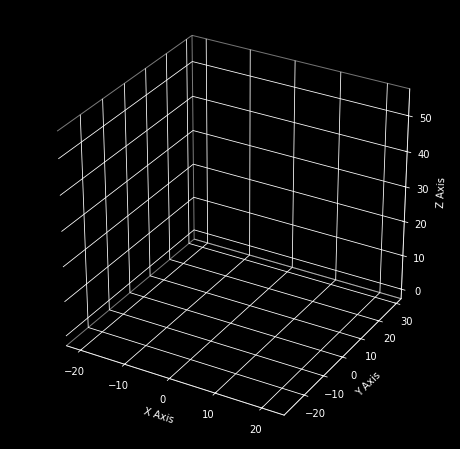

In [8]:
plots_data = [build_trajectory(Delta_T, Steps, 
    initial_values=initial_conditions[i]) for i in range(3)]
fig, ax = create_blank_chart_with_styling(plots_data, Padding, (8, 8))
plots = [ax.plot([],[],[], color=colors[i], label=str(initial_conditions[i]),
    lw=2, alpha=0.75, animated=True)[0] for i in range(3)]
dots = [ax.scatter([],[],[], s=100, c=colors[i], animated=True) for i in range(3)]

In [21]:
def update(i):
    frame_end = (i + 1) * Steps_per_frame
    for plot, dot, data in zip(plots, dots, plots_data):
        xs, ys, zs = data
        plot.set_data(xs[:frame_end], ys[:frame_end])
        plot.set_3d_properties(zs[:frame_end])
        dot._offsets3d = ([xs[frame_end]], [ys[frame_end]], [zs[frame_end]])
    ax.legend(loc=2, prop={'size': 10})
    ax.view_init(30, 45 + i)
anim = FuncAnimation(fig, update, frames=np.arange(0, int(Steps/Steps_per_frame)), interval=40)
anim.save('mainframe.gif', dpi=80, writer='pillow')